### Dataset link
### https://www.kaggle.com/datasets/vrajesh0sharma7/used-car-price-prediction/data

#### Column	Description
#### car_name	Name of the car (make + model, e.g., Maruti Swift, Hyundai i10).
#### yr_mfr	Year of manufacture of the car.
#### fuel_type	Type of fuel used (Petrol, Diesel, CNG, Electric, etc.).
#### kms_run	Kilometers driven by the car (odometer reading).
#### sale_price	Final listed selling price of the car (target column for regression).
#### city	City where the car is listed.
#### times_viewed	Number of times the listing was viewed online.
#### body_type	Body type of the car (Hatchback, Sedan, SUV, etc.).
#### transmission	Gear type (Manual / Automatic).
#### variant	Variant of the car (e.g., LXI, VDI, Sports, etc.).
#### assured_buy	Whether the car comes with an assured buy option (True/False).
#### registered_city	City where the car is registered.
#### registered_state	State where the car is registered.
#### is_hot	Indicates if the car is a “hot” listing (highly demanded).
#### rto	Regional Transport Office code of the registration.
#### source	Source platform of the listing.
#### make	Manufacturer of the car (e.g., Maruti, Hyundai, Honda).
#### model	Model name of the car (e.g., Swift, i10, City).
#### car_availability	Availability status of the car (Available/Sold).
#### total_owners	Number of previous owners (1, 2, 3, etc.).
#### broker_quote	Price quoted by broker/agent.
#### original_price	Original on-road price when the car was new.
#### car_rating	Rating of the car’s condition (Excellent, Good, Fair, etc.).
#### ad_created_on	Date and time when the ad was created.
#### fitness_certificate	Whether the car has a valid fitness certificate (True/False).
#### emi_starts_from	Monthly EMI amount if financed.
#### booking_down_pymnt	Minimum down payment required for booking.
#### reserved	Whether the car is already reserved (True/False).
#### warranty_avail	Availability of warranty (True/False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',40)

In [3]:
path = '../All_data_sets/practice/Used_Car_Price_Prediction.csv'

df = pd.read_csv(path)

df.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [4]:
df.shape

(7400, 29)

In [5]:
df.isnull().sum()

car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type               103
transmission            556
variant                   0
assured_buy               0
registered_city          10
registered_state         10
is_hot                    0
rto                       0
source                  126
make                      0
model                     0
car_availability        620
total_owners              0
broker_quote              0
original_price         3280
car_rating                9
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

### It has null values

### data cleaning and feature engineering

### handling the null values of categorical feature with mode

In [6]:
### handling null values of body_type
df['body_type'].unique()

array(['hatchback', 'sedan', 'suv', 'luxury sedan', 'luxury suv', nan],
      dtype=object)

In [7]:
body_type_mode = df['body_type'].mode()

body_type_mode[0]

'hatchback'

In [8]:
df['body_type'] = df['body_type'].fillna( body_type_mode[0] )

### handling null values of transmission

In [9]:
df['transmission'].unique()

array(['manual', nan, 'automatic'], dtype=object)

In [10]:
transmission_mode = df['transmission'].mode()
transmission_mode

0    manual
Name: transmission, dtype: object

In [11]:
df['transmission'] = df['transmission'].fillna( transmission_mode[0] )

In [12]:
# null records
df[df[['registered_city', 'registered_state']].isnull().any(axis=1)]

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
266,maruti 800,2005,petrol,58000,35,noida,661,hatchback,manual,dx,False,NaN,NaN,False,up14,inperson_sale,maruti,800,NaN,2,0,NaN,NaN,2020-10-23T07:04:48.262,False,1,6,False,False
563,renault captur,2017,diesel,48000,600000,gurgaon,304,hatchback,manual,1.5 platine diesel,False,NaN,NaN,False,hr26,inperson_sale,renault,captur,NaN,1,0,NaN,good,NaN,True,13937,90000,False,False
566,maruti sx4,2012,petrol,88300,260000,gurgaon,143,hatchback,manual,vxi,False,NaN,NaN,False,hr26,inperson_sale,maruti,sx4,NaN,1,0,NaN,good,2020-07-10T09:41:49.795,True,6039,39000,False,False
2514,honda city,2006,petrol,69000,110000,new delhi,137,hatchback,manual,vtec,False,NaN,NaN,False,dl4c,inperson_sale,honda,city,NaN,2,0,NaN,NaN,2020-09-12T06:58:53.466,NaN,2555,16500,False,False
4432,skoda fabia,2011,petrol,110000,300000,pune,257,hatchback,manual,elegance 1.2 mpi,False,NaN,NaN,False,mh12,inperson_sale,skoda,fabia,NaN,2,0,NaN,good,2020-08-25T13:09:29.356,True,6968,45000,False,False
4998,tata indica v2,2015,diesel,240000,170000,hyderabad,314,hatchback,manual,ls,False,NaN,NaN,False,ts07,inperson_sale,tata,indica v2,NaN,2,0,NaN,good,2020-09-10T08:28:59.133,True,3949,25500,False,False
5650,maruti wagon r,2001,petrol,72000,38000,kolkata,1614,hatchback,manual,lxi,False,NaN,NaN,False,wb24,inperson_sale,maruti,wagon r,NaN,2,0,NaN,NaN,2020-12-21T10:15:08.284,NaN,883,5700,False,False
6260,chevrolet optra,2005,petrol,102538,100000,ghaziabad,293,hatchback,manual,1.6,False,NaN,NaN,False,dl2c,inperson_sale,chevrolet,optra,NaN,3,0,NaN,NaN,2020-11-18T11:16:36.17,False,2323,15000,False,False
6700,maruti swift,2012,diesel,95000,260000,ahmedabad,120,hatchback,manual,vdi,False,NaN,NaN,False,gj01,inperson_sale,maruti,swift,NaN,2,0,NaN,NaN,2020-10-23T07:24:15.722,False,6039,39000,False,False
6723,ford figo,2014,petrol,37000,375000,bengaluru,128,hatchback,manual,1.2 exi duratec,False,NaN,NaN,False,ka04,inperson_sale,ford,figo,NaN,2,0,NaN,NaN,2021-01-10T09:54:46.724,False,8710,56250,False,False


In [13]:
group_by_city = df[['city','registered_city', 'registered_state']].groupby('city')

In [14]:
# Compute the mode of registered_city for each city group
registered_city_mode_dict = group_by_city['registered_city'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
registered_city_mode_dict

{'ahmedabad': 'ahmedabad',
 'bengaluru': 'bengaluru',
 'chennai': 'chennai',
 'faridabad': 'faridabad',
 'ghaziabad': 'delhi',
 'gurgaon': 'gurgaon',
 'hyderabad': 'hyderabad',
 'kolkata': 'kolkata',
 'lucknow': 'lucknow',
 'mumbai': 'mumbai',
 'new delhi': 'delhi',
 'noida': 'delhi',
 'pune': 'pune'}

In [15]:
# Function to fill null registered_city with the mode based on city
def fill_registered_city(row):
    if pd.isnull(row['registered_city']):
        return registered_city_mode_dict.get(row['city'], row['registered_city'])
    else:
        return row['registered_city']

# Apply the function row-wise
df['registered_city'] = df.apply(fill_registered_city, axis=1)

In [16]:
registered_state_mode_dict = group_by_city['registered_state'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
registered_state_mode_dict

{'ahmedabad': 'gujarat',
 'bengaluru': 'karnataka',
 'chennai': 'tamil nadu',
 'faridabad': 'haryana',
 'ghaziabad': 'delhi',
 'gurgaon': 'haryana',
 'hyderabad': 'telangana',
 'kolkata': 'west bengal',
 'lucknow': 'uttar pradesh',
 'mumbai': 'maharashtra',
 'new delhi': 'delhi',
 'noida': 'delhi',
 'pune': 'maharashtra'}

In [17]:
# Function to fill null registered_city with the mode based on city
def fill_registered_state(row):
    if pd.isnull(row['registered_state']):
        return registered_state_mode_dict.get(row['city'], row['registered_state'])
    else:
        return row['registered_state']

# Apply the function row-wise
df['registered_city'] = df.apply(fill_registered_city, axis=1)

In [18]:
# Apply the function row-wise
df['registered_state'] = df.apply(fill_registered_city, axis=1)

In [19]:
df.isnull().sum()

car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type                 0
transmission              0
variant                   0
assured_buy               0
registered_city           0
registered_state          0
is_hot                    0
rto                       0
source                  126
make                      0
model                     0
car_availability        620
total_owners              0
broker_quote              0
original_price         3280
car_rating                9
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

In [20]:
df['source'].unique()

array(['inperson_sale', nan, 'online', 'customer_to_customer'],
      dtype=object)

In [21]:
source_mode = df['source'].mode()
source_mode[0]

'inperson_sale'

In [22]:
df[df['source'].isna()]

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
228,hyundai santro xing,2010,petrol & cng,84568,135000,noida,442,hatchback,manual,gls cng,False,delhi,delhi,False,dl3c,NaN,hyundai,santro xing,NaN,2,102000,NaN,good,2019-05-04T10:31:10.299,True,3136,20250,False,True
229,mahindra xuv500,2015,diesel,45412,700000,noida,179,suv,manual,w6 4x2,False,noida,noida,False,up16,NaN,mahindra,xuv500,NaN,1,622000,NaN,good,2019-03-15T13:45:51.731,True,16259,105000,False,False
275,hyundai verna,2011,diesel,117782,250000,noida,491,sedan,manual,fluidic 1.6 ex crdi,False,delhi,delhi,False,dl6c,NaN,hyundai,verna,NaN,2,203000,NaN,great,2019-03-29T13:32:57.248,True,5807,37500,False,False
276,toyota etios liva,2012,diesel,37193,250000,noida,196,hatchback,manual,d 4d gd,False,noida,noida,False,up16,NaN,toyota,etios liva,NaN,1,181000,NaN,great,2019-03-14T11:17:20.168,True,5807,37500,False,True
553,mahindra bolero,2011,diesel,157428,250000,gurgaon,1935,suv,manual,sle,False,gurgaon,gurgaon,False,hr26,NaN,mahindra,bolero,NaN,1,154000,NaN,good,2019-04-04T10:08:53.687,True,5807,37500,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,honda city zx,2008,petrol,113515,80000,new delhi,707,sedan,automatic,gxi cvt,False,ghaziabad,ghaziabad,False,up14,NaN,honda,city zx,NaN,1,79000,NaN,great,2019-04-01T12:53:09.011,False,1858,12000,False,False
6977,honda city,2014,diesel,122226,590000,hyderabad,41,sedan,manual,sv mt diesel,False,hyderabad,hyderabad,False,ts08,NaN,honda,city,NaN,1,469000,NaN,great,2019-04-01T09:17:31.756,True,13704,88500,False,False
7180,maruti celerio,2017,petrol,8865,480000,bengaluru,80,hatchback,manual,vxi (o),False,bangalore central,bangalore central,False,ka03,NaN,maruti,celerio,NaN,1,368000,NaN,good,2019-03-24T08:43:48.56,True,11149,72000,False,False
7223,honda amaze,2017,petrol,10143,550000,ahmedabad,226,sedan,manual,1.2 s (o) mt i vtec,False,mehsana,mehsana,False,gj02,NaN,honda,amaze,NaN,1,472000,NaN,great,2019-03-18T13:09:31.266,True,12775,82500,False,False


In [23]:
df['source'] = df['source'].fillna( source_mode[0] )

In [24]:
car_availability_mode = df['car_availability'].mode()
car_availability_mode[0]

'in_stock'

In [25]:
df['car_availability'] = df['car_availability'].fillna(car_availability_mode[0])

In [26]:
car_rating_mode = df['car_rating'].mode()
car_rating_mode[0]

'great'

In [27]:
df['car_rating'] = df['car_rating'].fillna( car_rating_mode[0] )

### Handling the null values of numerical feature

In [28]:
# Fill the null values based on the car name(model and make)

car_price = df[['car_name','original_price']].groupby('car_name')

car_price_dict = car_price['original_price'].median().to_dict()

car_price_dict

{'audi a3': 2053200.0,
 'audi a4': 1173920.5,
 'audi a6': 1247884.5,
 'audi q3': 1451138.0,
 'bmw 3 series': 1551217.0,
 'bmw 5 series': 1130407.0,
 'bmw x1': 801199.0,
 'bmw x3': 1359521.0,
 'chevrolet aveo u va': nan,
 'chevrolet beat': 166870.0,
 'chevrolet cruze': 500205.5,
 'chevrolet enjoy': 435000.0,
 'chevrolet optra': nan,
 'chevrolet optra magnum': nan,
 'chevrolet sail uva': 255599.0,
 'chevrolet spark': 128120.0,
 'datsun go': 224992.0,
 'datsun go plus': 306621.0,
 'datsun redi go': 270998.5,
 'fiat grand punto': 338505.5,
 'fiat linea': nan,
 'fiat punto evo': 436830.0,
 'fiat punto pure': nan,
 'ford ecosport': 695814.0,
 'ford fiesta': 302299.0,
 'ford fiesta classic': nan,
 'ford figo': 263129.0,
 'ford figo aspire': 629899.0,
 'ford freestyle': 635160.0,
 'ford ikon': nan,
 'ford new figo': 486580.0,
 'honda accord': 395000.0,
 'honda amaze': 441793.0,
 'honda br-v': 757752.0,
 'honda brio': 346028.0,
 'honda city': 527424.0,
 'honda city zx': nan,
 'honda civic': 331

In [29]:
df.isnull().sum()

car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type                 0
transmission              0
variant                   0
assured_buy               0
registered_city           0
registered_state          0
is_hot                    0
rto                       0
source                    0
make                      0
model                     0
car_availability          0
total_owners              0
broker_quote              0
original_price         3280
car_rating                0
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

In [30]:
def fill_original_price(row):
    
    if( pd.isnull( row['original_price'] ) ):
        
        return car_price_dict.get( row['car_name'] )
        
    return row['original_price']
        

df['original_price'] = df.apply(fill_original_price  , axis=1)


In [31]:
df.isnull().sum()

car_name                0
yr_mfr                  0
fuel_type               0
kms_run                 0
sale_price              0
city                    0
times_viewed            0
body_type               0
transmission            0
variant                 0
assured_buy             0
registered_city         0
registered_state        0
is_hot                  0
rto                     0
source                  0
make                    0
model                   0
car_availability        0
total_owners            0
broker_quote            0
original_price         78
car_rating              0
ad_created_on           1
fitness_certificate     8
emi_starts_from         0
booking_down_pymnt      0
reserved                0
warranty_avail          0
dtype: int64

In [32]:
car_price_make = df[['make','original_price']].groupby('make')

car_price_make_dict = car_price['original_price'].median().to_dict()

car_price_make_dict

{'audi a3': 2053200.0,
 'audi a4': 1173920.5,
 'audi a6': 1247884.5,
 'audi q3': 1451138.0,
 'bmw 3 series': 1551217.0,
 'bmw 5 series': 1130407.0,
 'bmw x1': 801199.0,
 'bmw x3': 1359521.0,
 'chevrolet aveo u va': nan,
 'chevrolet beat': 166870.0,
 'chevrolet cruze': 500205.5,
 'chevrolet enjoy': 435000.0,
 'chevrolet optra': nan,
 'chevrolet optra magnum': nan,
 'chevrolet sail uva': 255599.0,
 'chevrolet spark': 128120.0,
 'datsun go': 224992.0,
 'datsun go plus': 306621.0,
 'datsun redi go': 270998.5,
 'fiat grand punto': 338505.5,
 'fiat linea': nan,
 'fiat punto evo': 436830.0,
 'fiat punto pure': nan,
 'ford ecosport': 695814.0,
 'ford fiesta': 302299.0,
 'ford fiesta classic': nan,
 'ford figo': 263129.0,
 'ford figo aspire': 629899.0,
 'ford freestyle': 635160.0,
 'ford ikon': nan,
 'ford new figo': 486580.0,
 'honda accord': 395000.0,
 'honda amaze': 441793.0,
 'honda br-v': 757752.0,
 'honda brio': 346028.0,
 'honda city': 527424.0,
 'honda city zx': nan,
 'honda civic': 331

In [33]:
def fill_original_price_make(row):
    
    if( pd.isnull( row['original_price'] ) ):
        
        return car_price_make_dict.get( row['make'] )
        
    return row['original_price']
        

df['original_price'] = df.apply(fill_original_price_make  , axis=1)

In [34]:
df['original_price'] = df['original_price'].fillna( df['original_price'].mean() )

In [35]:
df.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
broker_quote           0
original_price         0
car_rating             0
ad_created_on          1
fitness_certificate    8
emi_starts_from        0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

In [36]:
df.head(3)

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,noida,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,agra,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,488119.5,great,2021-03-20T05:36:31.311,True,11096,71655,False,False


### Feature selection

In [37]:
selected_features = [ 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city','body_type', 'transmission', 
                     'variant', 'assured_buy','make', 'model','total_owners', 'original_price', 'car_rating']

In [38]:
df_selected = df[selected_features]
df_selected.head()

,yr_mfr,fuel_type,kms_run,sale_price,city,body_type,transmission,variant,assured_buy,make,model,total_owners,original_price,car_rating
0,2015,petrol,8063,386399,noida,hatchback,manual,lxi opt,True,maruti,swift,2,404177.0,great
1,2016,petrol,23104,265499,noida,hatchback,manual,lxi,True,maruti,alto 800,1,354313.0,great
2,2017,petrol,23402,477699,noida,hatchback,manual,sports 1.2 vtvt,True,hyundai,grand i10,1,488119.5,great
3,2013,diesel,39124,307999,noida,hatchback,manual,vdi,True,maruti,swift,1,374326.0,great
4,2015,petrol,22116,361499,noida,hatchback,manual,magna 1.2 vtvt,False,hyundai,grand i10,1,367216.0,great


### EDA

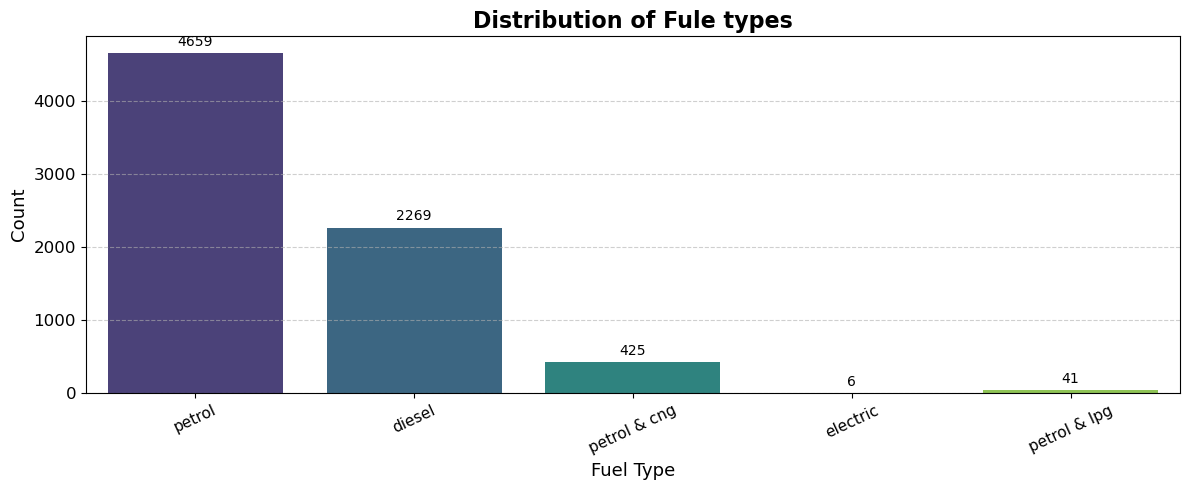

In [39]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(
    data=df_selected, 
    x='fuel_type', 
    hue='fuel_type',        
    palette='viridis', 
    legend=False       
)

plt.title('Distribution of Fule types', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Type', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=25, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()

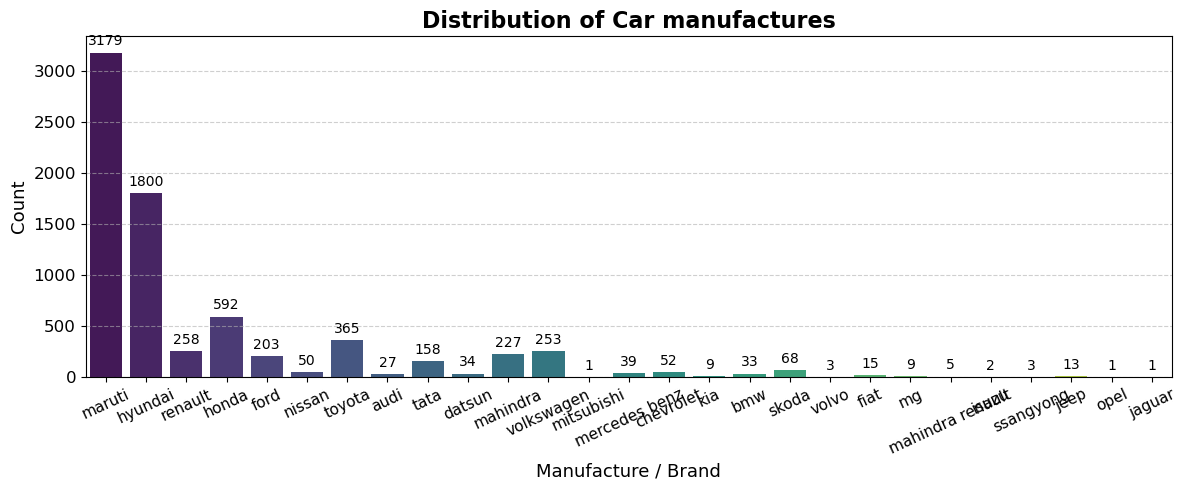

In [40]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(
    data=df_selected, 
    x='make', 
    hue='make',        
    palette='viridis', 
    legend=False       
)

plt.title('Distribution of Car manufactures', fontsize=16, fontweight='bold')
plt.xlabel('Manufacture / Brand', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=25, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()

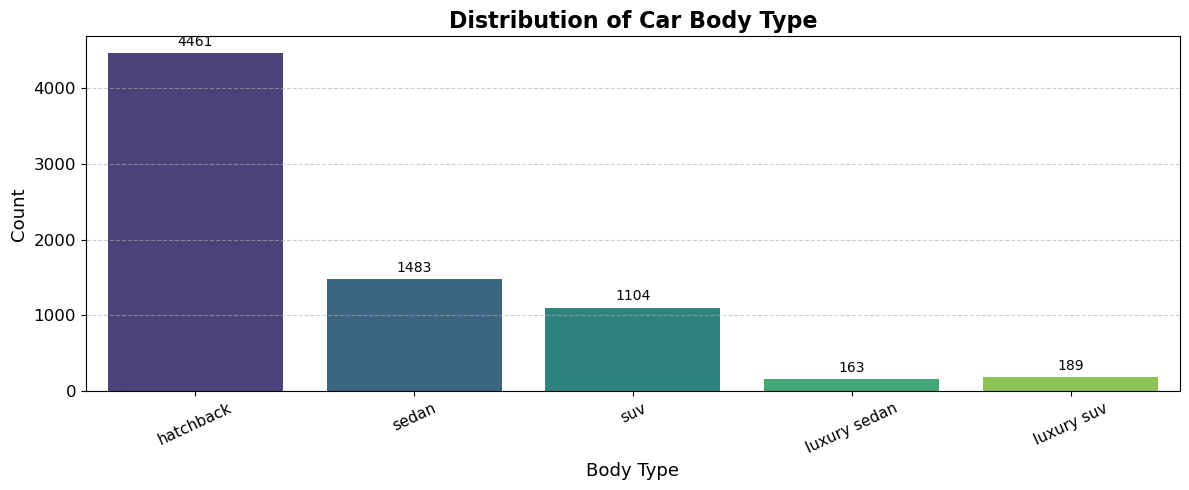

In [41]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(
    data=df_selected, 
    x='body_type', 
    hue='body_type',        
    palette='viridis', 
    legend=False       
)

plt.title('Distribution of Car Body Type', fontsize=16, fontweight='bold')
plt.xlabel('Body Type', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=25, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()

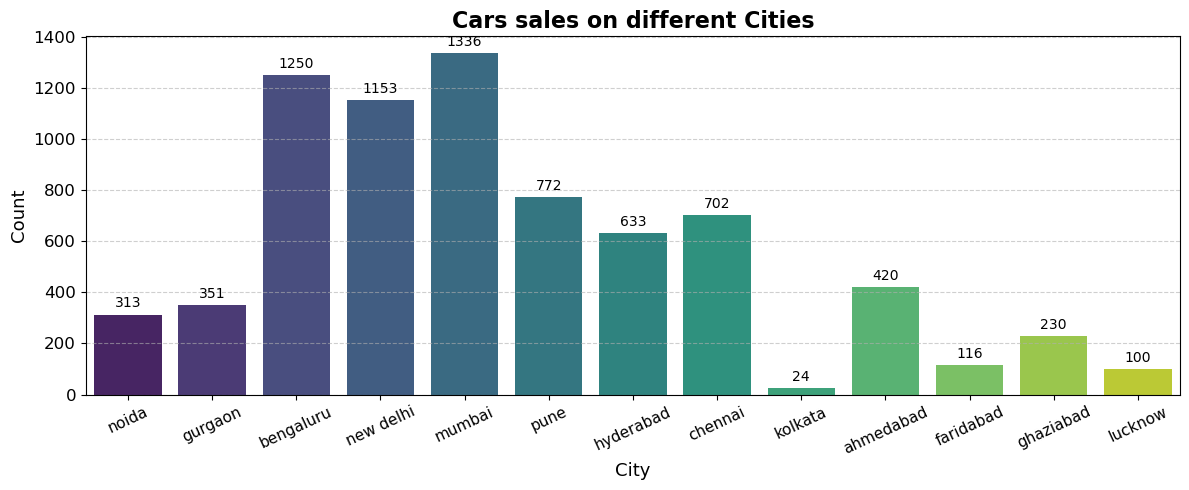

In [42]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(
    data=df_selected, 
    x='city', 
    hue='city',        
    palette='viridis', 
    legend=False       
)

plt.title('Cars sales on different Cities', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=25, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()

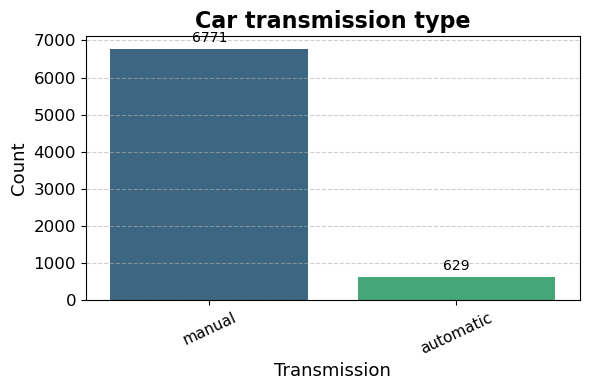

In [43]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=df_selected, 
    x='transmission', 
    hue='transmission',        
    palette='viridis', 
    legend=False       
)

plt.title('Car transmission type', fontsize=16, fontweight='bold')
plt.xlabel('Transmission', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=25, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()

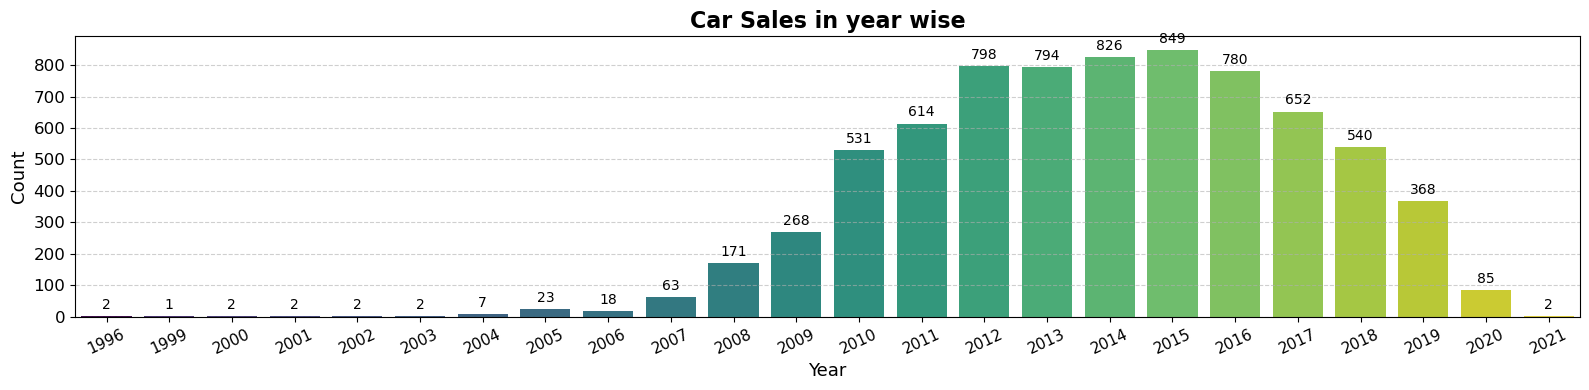

In [44]:
plt.figure(figsize=(16, 4))
ax = sns.countplot(
    data=df_selected, 
    x='yr_mfr', 
    hue='yr_mfr',        
    palette='viridis', 
    legend=False       
)

plt.title('Car Sales in year wise', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=25, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [45]:
df_selected.head()

,yr_mfr,fuel_type,kms_run,sale_price,city,body_type,transmission,variant,assured_buy,make,model,total_owners,original_price,car_rating
0,2015,petrol,8063,386399,noida,hatchback,manual,lxi opt,True,maruti,swift,2,404177.0,great
1,2016,petrol,23104,265499,noida,hatchback,manual,lxi,True,maruti,alto 800,1,354313.0,great
2,2017,petrol,23402,477699,noida,hatchback,manual,sports 1.2 vtvt,True,hyundai,grand i10,1,488119.5,great
3,2013,diesel,39124,307999,noida,hatchback,manual,vdi,True,maruti,swift,1,374326.0,great
4,2015,petrol,22116,361499,noida,hatchback,manual,magna 1.2 vtvt,False,hyundai,grand i10,1,367216.0,great


### seperate the dependent and independent features

In [46]:
X = df_selected.drop( columns='sale_price' )
y = df_selected['sale_price']

In [47]:
X.head()

,yr_mfr,fuel_type,kms_run,city,body_type,transmission,variant,assured_buy,make,model,total_owners,original_price,car_rating
0,2015,petrol,8063,noida,hatchback,manual,lxi opt,True,maruti,swift,2,404177.0,great
1,2016,petrol,23104,noida,hatchback,manual,lxi,True,maruti,alto 800,1,354313.0,great
2,2017,petrol,23402,noida,hatchback,manual,sports 1.2 vtvt,True,hyundai,grand i10,1,488119.5,great
3,2013,diesel,39124,noida,hatchback,manual,vdi,True,maruti,swift,1,374326.0,great
4,2015,petrol,22116,noida,hatchback,manual,magna 1.2 vtvt,False,hyundai,grand i10,1,367216.0,great


In [48]:
y.head()

0    386399
1    265499
2    477699
3    307999
4    361499
Name: sale_price, dtype: int64

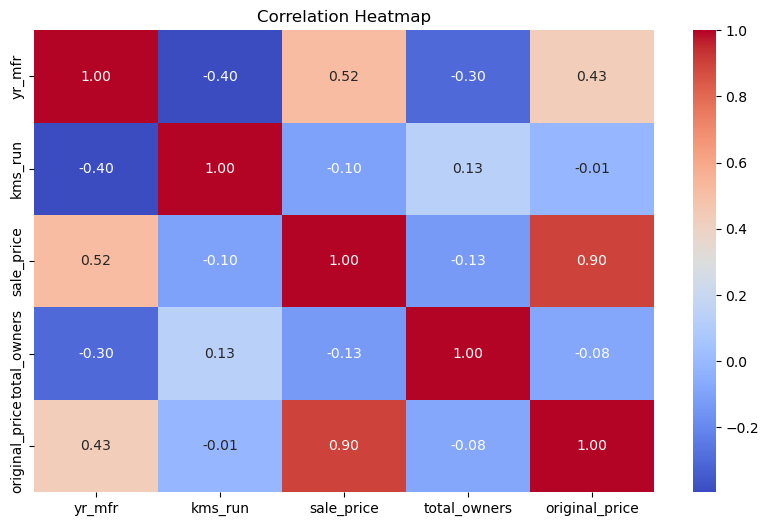

In [49]:
plt.figure(figsize=(10,6))
numeric_cols = df_selected.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(numeric_cols, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### convert the categorical columns into numerical and scale the numerical features

In [50]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

In [51]:
ohe = OneHotEncoder( drop='first' , dtype='int' ,handle_unknown='ignore')
scale = StandardScaler()

In [52]:
cat_cols = [col for col in X.columns if X[col].dtype == 'O' ]

num_cols = [col for col in X.columns if X[col].dtype != 'O' ]

In [53]:
preprocessing = ColumnTransformer( transformers=[
    ('encoder' , ohe , cat_cols),
    ('scale' , scale , num_cols),
] , remainder='passthrough' )

### split the data into train and test

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
X_train_transformed = preprocessing.fit_transform( X_train )

X_test_transformed = preprocessing.transform( X_test )

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [57]:
preprocessing.get_feature_names_out()

array(['encoder__fuel_type_electric', 'encoder__fuel_type_petrol',
       'encoder__fuel_type_petrol & cng', ..., 'scale__assured_buy',
       'scale__total_owners', 'scale__original_price'], dtype=object)

In [58]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [59]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [60]:
results = {}
errors = {}
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    acc = r2_score(y_test, y_pred) * 100  # percentage
    err = mean_absolute_error( y_test, y_pred )
    results[name] = acc
    errors[name] = err
    print(f"{name}: {acc:.2f}%")

Linear Regression: 91.32%
Decision Tree: 87.92%
Random Forest: 91.97%
Gradient Boosting: 90.18%
KNN: 88.27%
SVR: -4.96%
XGBoost: 91.14%


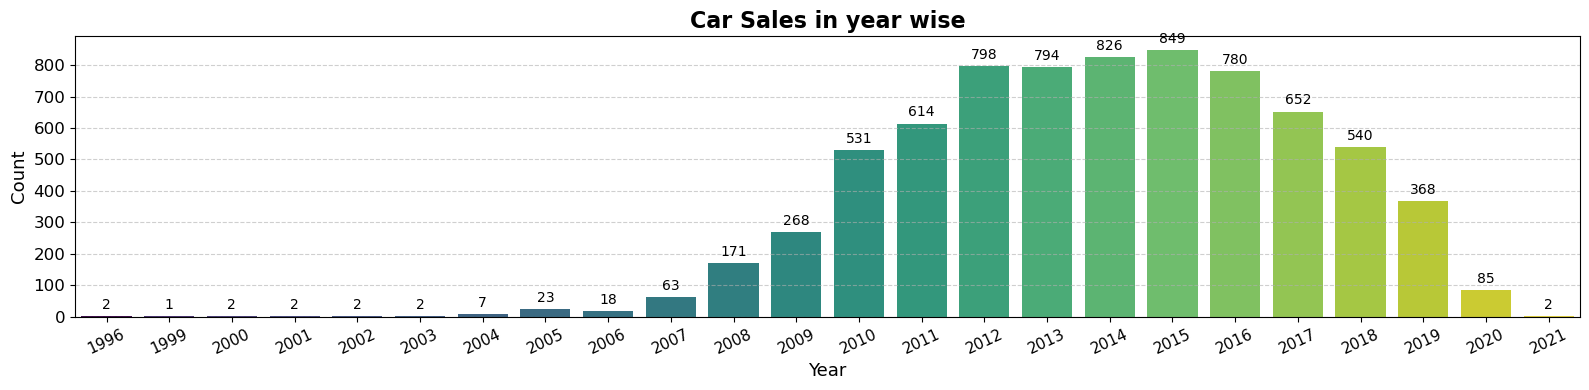

In [61]:
plt.figure(figsize=(16, 4))
ax = sns.countplot(
    data=df_selected, 
    x='yr_mfr', 
    hue='yr_mfr',        
    palette='viridis', 
    legend=False       
)

plt.title('Car Sales in year wise', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=25, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()

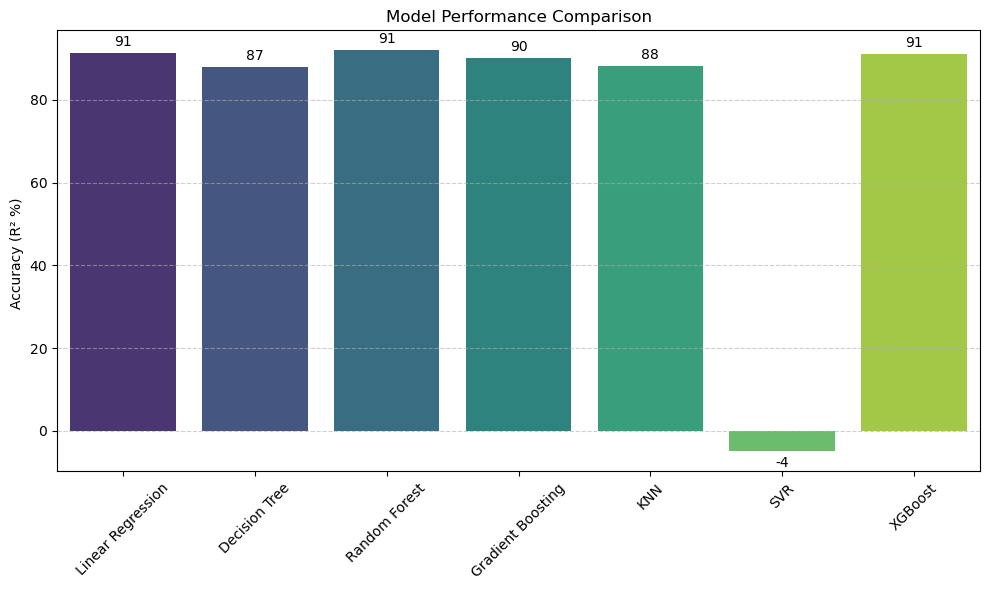

In [62]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=list(results.keys()), y=list(results.values()),hue=list(results.keys()) , palette='viridis')
plt.xticks(rotation=45)
plt.ylabel("Accuracy (R² %) ")
plt.title("Model Performance Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.6)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()

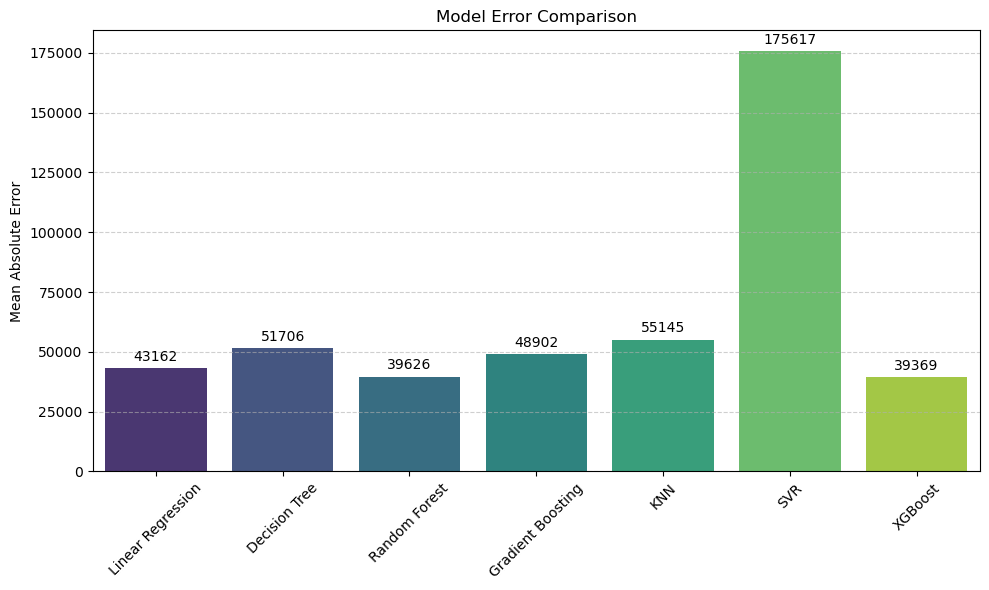

In [63]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=list(results.keys()), y=list(errors.values()) , hue=list(results.keys()) , palette='viridis')
plt.xticks(rotation=45)
plt.ylabel("Mean Absolute Error")
plt.title("Model Error Comparison")

plt.grid(axis='y', linestyle='--', alpha=0.6)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()